In [2]:
# Load the Pandas libraries with alias 'pd' 
import pandas as pd 
# Read data from file 'filename.csv' 
# (in the same directory that your python process is based)
# Control delimiters, rows, column names with read_csv (see later) 
data = pd.read_csv("data_ayse_1.csv",sep = ',',names=['X1', 'X2']) 
# Preview the first 5 lines of the loaded data 
data.head()

,X1,X2
0,32.502345,31.707006
1,53.426804,68.777596
2,61.530358,62.562382
3,47.475640,71.546632
4,59.813208,87.230925


In [3]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
X1    100 non-null float64
X2    100 non-null float64
dtypes: float64(2)
memory usage: 1.7 KB


In [4]:
data.describe()


,X1,X2
count,100.000000,100.000000
mean,48.958341,72.735051
std,9.746379,16.658187
min,25.128485,31.707006
25%,41.526164,60.788586
50%,49.634970,72.179542
75%,56.762631,83.215080
max,70.346076,118.591217


In [5]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "end_to_end_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

Saving figure attribute_histogram_plots


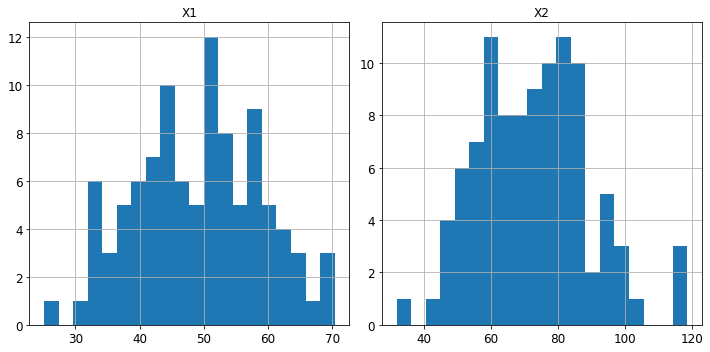

In [6]:
import matplotlib.pyplot as plt
data.hist(bins=20, figsize=(10,5))
save_fig("attribute_histogram_plots")
plt.show()

In [7]:
# to make this notebook's output identical at every run
np.random.seed(25)

In [8]:
import numpy as np
data_X=data["X1"].copy()
data_labels=data["X2"].copy()
from sklearn.model_selection import train_test_split
data_X_train, data_X_test, data_labels_train, data_labels_test = train_test_split(data_X, data_labels, test_size=0.2, random_state=101)

In [9]:
len(data_train)

NameError: name 'data_train' is not defined

In [10]:
len(data_test)

NameError: name 'data_test' is not defined

Saving figure better_visualization_plot


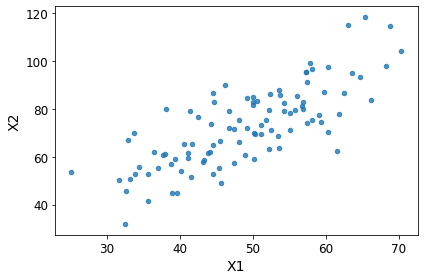

In [11]:
data.plot(kind="scatter", x="X1", y="X2",alpha=0.8)
save_fig("better_visualization_plot")

In [12]:
corr_matrix = data.corr()

In [13]:
corr_matrix

,X1,X2
X1,1.000000,0.773728
X2,0.773728,1.000000


In [14]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
data_X_train=pd.DataFrame(data_X_train)
#data_X_train=data_X_train.reshape(-1, 1)
lin_reg.fit(data_X_train,data_labels_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [15]:
data_X_test=pd.DataFrame(data_X_test)
data_pred=lin_reg.predict(data_X_test)
print("Predictions:", lin_reg.predict(data_X_test))

Predictions: [66.69009216 78.2132477  65.61342832 83.40186451 57.88027313 94.02104701
 73.74719418 66.44662073 76.61126293 64.8851823  53.0382694  86.05042361
 50.84418199 87.23495218 51.40426409 54.66622595 58.03102495 63.72252325
 70.36664925 52.42001285]


In [16]:
from sklearn.metrics import mean_squared_error

data_pred = lin_reg.predict(data_X_test)
lin_mse = mean_squared_error(data_labels_test, data_pred)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

11.400922656339294

In [17]:
from sklearn.metrics import mean_absolute_error

lin_mae = mean_absolute_error(data_labels_test, data_pred)
lin_mae

8.943721753674396

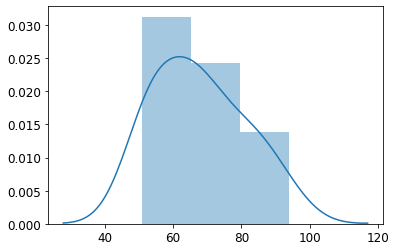

In [18]:
import seaborn as sns
sns.distplot((data_pred))

In [19]:
data_labels_pred=pd.DataFrame(data_pred)
data_labels_pred.head()

,0
0,66.690092
1,78.213248
2,65.613428
3,83.401865
4,57.880273


In [20]:
data_labels_test.head()

16    82.892504
1     68.777596
43    61.424710
67    95.536687
89    61.366905
Name: X2, dtype: float64

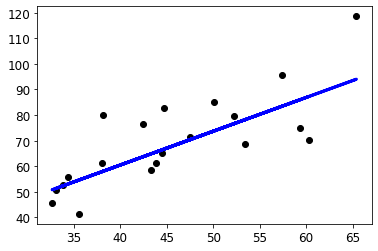

In [21]:
plt.scatter(data_X_test, data_labels_test,  color='black')
plt.plot(data_X_test, data_labels_pred, color='blue', linewidth=3)

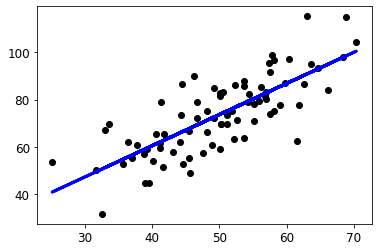

In [44]:
data_pred_train = lin_reg.predict(data_X_train)
data_labels_pred_train=pd.DataFrame(data_pred_train)
plt.scatter(data_X_train, data_labels_train,  color='black')
plt.plot(data_X_train, data_labels_pred_train, color='blue', linewidth=3)

In [22]:
print(lin_reg.coef_)

[1.31849802]


In [23]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg.fit(data_X_train, data_labels_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

In [24]:
data_predictions_rf = forest_reg.predict(data_X_train)
forest_mse = mean_squared_error(data_labels_train, data_predictions_rf)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

4.894986241529041

In [26]:
from sklearn.model_selection import cross_val_score

forest_scores = cross_val_score(forest_reg, data_X_train, data_labels_train,
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
forest_rmse_scores

array([14.89877185, 13.54981676, 10.69096083, 11.47530231, 12.56398858,
       10.52267137, 14.44370412, 15.15781873, 17.8969687 , 12.20919577])

In [27]:
scores = cross_val_score(lin_reg, data_X_train, data_labels_train, scoring="neg_mean_squared_error", cv=10)
pd.Series(np.sqrt(-scores)).describe()

count    10.000000
mean     10.599629
std       1.386746
min       8.232837
25%       9.889075
50%      10.826337
75%      11.704089
max      12.399531
dtype: float64

In [52]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        'n_estimators': randint(low=1, high=200),
        'max_features': randint(low=1, high=2),
    }

forest_reg = RandomForestRegressor(random_state=42)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)

In [53]:
rnd_search.fit(data_X_train, data_labels_train)

RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators='warn',
                                                   n_jobs=None, oob_score=False,
                                                   random_sta...


In [54]:
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

13.172733336679414 {'max_features': 1, 'n_estimators': 103}
13.10146376734707 {'max_features': 1, 'n_estimators': 180}
13.190486574654289 {'max_features': 1, 'n_estimators': 93}
12.944697483390696 {'max_features': 1, 'n_estimators': 15}
13.158735556764773 {'max_features': 1, 'n_estimators': 107}
13.12705504084366 {'max_features': 1, 'n_estimators': 72}
13.096071162822161 {'max_features': 1, 'n_estimators': 189}
12.918639020785196 {'max_features': 1, 'n_estimators': 21}
13.172733336679414 {'max_features': 1, 'n_estimators': 103}
13.158299830666735 {'max_features': 1, 'n_estimators': 122}


In [55]:
feature_importances = rnd_search.best_estimator_.feature_importances_
feature_importances

array([1.])

In [56]:
final_model = rnd_search.best_estimator_
final_predictions = final_model.predict(data_X_test)
final_mse = mean_squared_error(data_labels_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [57]:
final_rmse

13.80343636575718

In [58]:
final_predictions_train = final_model.predict(data_X_train)
final_mse_train = mean_squared_error(data_labels_train, final_predictions_train)
final_rmse_train = np.sqrt(final_mse_train)

In [59]:
final_rmse_train

4.943023512078097